# Heart Disease Prediction

### Introduction

Heart disease, also known as cardiovascular disease, is a leading cause of morbidity and mortality worldwide. It encompasses various conditions that affect the heart and blood vessels, including coronary artery disease, heart failure, arrhythmias, and more. Early detection and accurate prediction of heart disease can significantly improve patient outcomes and reduce the burden on healthcare systems.

Heart disease prediction using machine learning holds great promise in the field of healthcare. By identifying individuals at risk early on, it allows for proactive intervention and personalized treatment, ultimately contributing to better patient outcomes and reducing the burden of heart disease on society. However, it's crucial to acknowledge that machine learning models are not a substitute for medical expertise but rather a valuable tool to aid healthcare professionals in their decision-making process.

#### About the data

The dataset used for heart disease prediction, obtained from Kaggle, contains several features (columns) that provide valuable information for training machine learning models. Here is a brief description of each feature:

age: The age of the patient in years.

sex: The patient's sex (0 for female, 1 for male).

cp: Chest pain type experienced by the patient. It is categorized into four values:

        0: Typical angina (chest pain related to reduced blood flow to the heart).

        1: Atypical angina.

        2: Non-anginal pain.

        3: Asymptomatic (no chest pain).

trestbps: Resting blood pressure (in mm Hg) when the patient was admitted to the hospital.

chol: Serum cholesterol level (in mg/dl) at the time of admission.

fbs: Fasting blood sugar (> 120 mg/dl) indicating whether the patient's fasting blood sugar is higher than normal (1 for true, 0 for false).

restecg: Resting electrocardiographic results. Categorized into three values:

        0: Normal.

        1: Abnormal ST-T wave.

        2: Probable or definite left ventricular hypertrophy.

thalach: Maximum heart rate achieved during exercise.

exang: Exercise-induced angina (1 for yes, 0 for no). It indicates whether the patient experienced angina (chest pain) during exercise.

oldpeak: ST depression induced by exercise relative to rest, which reflects abnormal heart activity.

slope: The slope of the peak exercise ST segment.

        0: Upsloping.

        1: Flat.

        2: Downsloping.

ca: The number of major vessels (0-3) colored by fluoroscopy. It represents the number of major blood vessels obstructed by plaques.

thal: Thallium stress test result:

        1: Normal.

        2: Fixed defect (no blood flow in some part of the heart).

        3: Reversible defect (a blood flow decrease during stress that returns to normal afterward).

target: The target variable that indicates the presence of heart disease:

        0: No heart disease.

        1: Presence of heart disease.

The goal of using this dataset is to build a machine learning model that can predict the likelihood of a patient having heart disease based on their medical characteristics. By training on historical data with known outcomes, the model can learn patterns and relationships to make accurate predictions on new, unseen data. This predictive model can then assist healthcare professionals in identifying patients at risk and recommending appropriate interventions for early detection and effective management of heart disease.

#### Import Packages

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Load the data

In [146]:
df_original = pd.read_csv('./data/heart.csv')

I'm going to change the order of the values of Chest Paint (cp) because I consider that 3 should represent painful chest pain and 0 to represent non-painful (asymptomatic) chest pain

In [147]:
cp_mapping = {0: 3, 1: 2, 2: 1, 3: 0}
df_original['cp'] = df_original['cp'].replace(cp_mapping)

In [148]:
df_original.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,3,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,3,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,3,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,3,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,3,138,294,1,1,106,0,1.9,1,3,2,0


In [149]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [150]:
df_original.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,2.057561,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Observations

Indeed, the dataset appears to be well-prepared and user-friendly for machine learning purposes. It has several advantages that make it suitable for analysis:

1. No Missing Values (NaNs): The dataset does not contain any missing values, which is essential for training machine learning models. Missing data can lead to biased results and may require additional preprocessing techniques.

2. Numeric Data: All the columns, except for "oldpeak," are already in numeric format. Numeric data is preferable for most machine learning algorithms as they require numerical inputs to perform calculations effectively.

3. Limited Preprocessing: Since there are no missing values and most features are already numeric, there is less need for extensive data preprocessing. It saves time and effort during the data preparation phase.

4. Potential Predictive Power: The available columns, such as age, sex, chest pain type, blood pressure, cholesterol level, and heart rate, can be valuable predictors of heart disease. The target column ("target") also provides labeled data for supervised machine learning.

5. Limited Feature Selection: As all columns seem relevant to the prediction task, there may be no immediate need to eliminate any specific features. Retaining all features could provide a comprehensive view of the patient's health profile for more accurate predictions.

6. Handling Float Data: The presence of a float column ("oldpeak") is not an issue for machine learning models, as most algorithms can handle numerical values, whether they are integers or floats.

#### Correlation Matrix

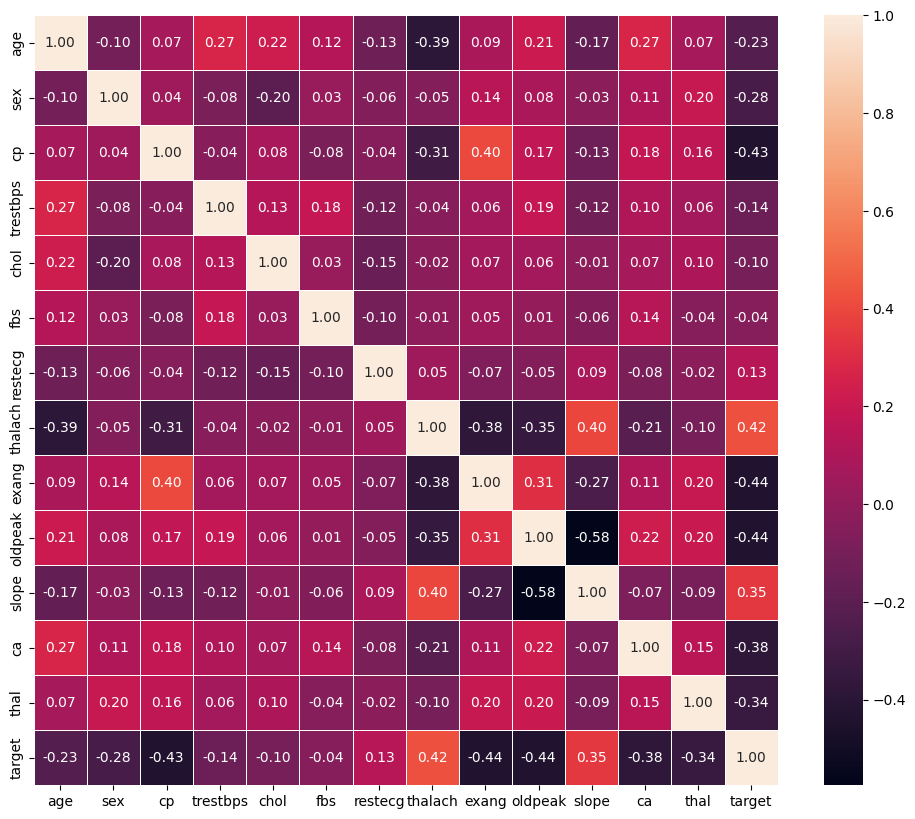

In [151]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_original.corr(), annot=True, fmt=".2f", linewidths=0.5);

Presence of Heart Disease (target) and several features like Chest Pain Type (cp), Maximum Heart Rate Achieved (thalach), and Number of Major Vessels Colored by Fluoroscopy (ca) show notable correlations. These features appear to be potential important predictors for heart disease prediction.

ST Depression Induced by Exercise (oldpeak) and Slope of the Peak Exercise ST Segment (slope) have a negative correlation of -0.58. This negative correlation suggests that as the ST depression (measured in oldpeak) increases, the slope of the peak exercise ST segment tends to decrease.

The negative correlation between "oldpeak" and "slope" implies that higher ST depression during exercise is associated with a flatter slope of the peak exercise ST segment. The "slope" feature refers to the shape of the ST segment on an electrocardiogram (ECG) during exercise testing. A downsloping ST segment may indicate a higher risk of heart disease or abnormalities in cardiac function.



We do not have very high correlations; therefore, we are not considering removing any columns at the moment.

#### Model Preparation

In [152]:
y = df_original["target"]
X = df_original.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We are going to set up this models:

1. Logistic Regressor
2. Random Forest Classifier
3. Extreme Gradient Boost
4. K-Nearest Neighbour
5. Support Vector Machine

In [154]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("Accuracy of Logistic Regression:",lr_acc_score,'\n')

confussion matrix
[[ 77  21]
 [  7 100]]
Accuracy of Logistic Regression: 0.8634146341463415 



In [155]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("Accuracy of Random Forest:",rf_acc_score,'\n')

confussion matrix
[[ 90   8]
 [  4 103]]
Accuracy of Random Forest: 0.9414634146341463 



In [156]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score,'\n')

confussion matrix
[[ 89   9]
 [  2 105]]
Accuracy of Extreme Gradient Boost: 0.9463414634146341 



In [157]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score,'\n')

confussion matrix
[[84 14]
 [11 96]]
Accuracy of K-NeighborsClassifier: 0.8780487804878049 



In [158]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')

confussion matrix
[[ 94   4]
 [  0 107]]
Accuracy of Support Vector Classifier: 0.9804878048780488 



#### Feature importances

The next step is checking the feature importances of one of our models, in that case we are looking from Extreme Gradient Boost and Random Forest

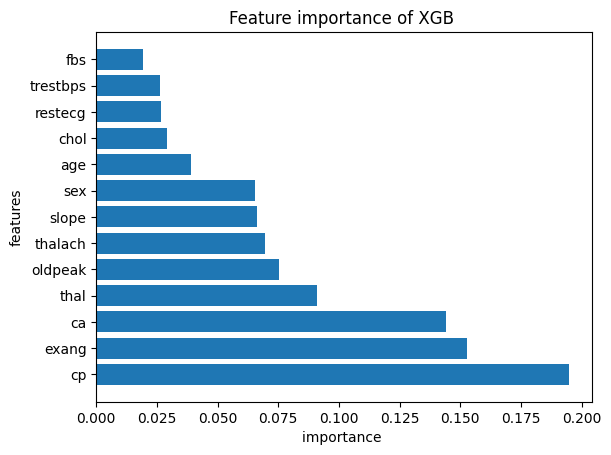

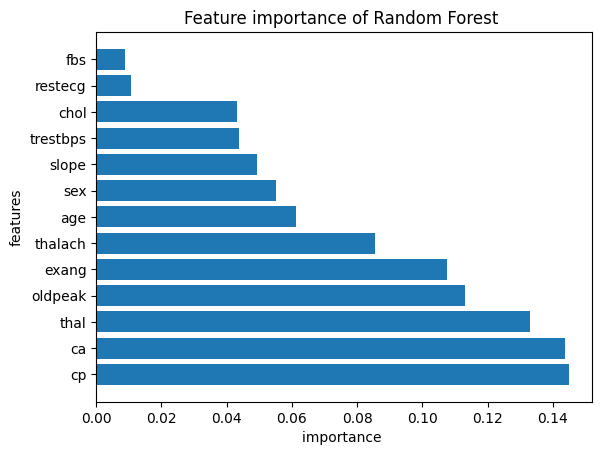

In [159]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
imp_feature.sort_values(by='Importance', ascending=False, inplace=True)
plt.title("Feature importance of XGB ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rf.feature_importances_})
imp_feature.sort_values(by='Importance', ascending=False, inplace=True)
plt.title("Feature importance of Random Forest ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

In both models, we have observed that "Fasting blood sugar" (fbs) is considered the least important feature, while "Chest Pain" (cp) stands out as the most important feature. As a result, we have decided to remove "Fasting blood sugar" (fbs) from the model to check if it leads to any improvements.

Upon removal of the "Fasting blood sugar" (fbs) feature, we expect the model's performance to be reevaluated. Eliminating this less influential feature might result in several benefits, including:

1. Reduced Dimensionality: Removing the "Fasting blood sugar" feature reduces the dimensionality of the dataset, potentially making the model training process faster and less computationally intensive.

2. Enhanced Interpretability: By discarding the less important feature, the model's interpretability may improve. A simpler model with fewer features can be easier to understand and explain to stakeholders.

3. Potential Performance Improvement: While "Fasting blood sugar" has shown to be less relevant in both models, its presence could still introduce some noise to the model. By eliminating it, the model may focus on more informative features, possibly leading to enhanced predictive performance.

4. Focus on Most Important Feature: With "Chest Pain" (cp) identified as the top importance feature in both models, removing less influential features allows the model to prioritize and focus on the most critical predictor of heart disease.

However, it is essential to keep in mind that the decision to remove a feature should be based on thorough analysis, domain knowledge, and validation using appropriate evaluation metrics. Depending on the dataset and the specific machine learning algorithm used, the impact of removing features can vary.

In [160]:
y = df_original["target"]
X = df_original.drop(['target','fbs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [161]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("Accuracy of Random Forest:",rf_acc_score,'\n')

confussion matrix
[[ 89   9]
 [  2 105]]
Accuracy of Random Forest: 0.9463414634146341 



In [163]:
xgb2 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb2.fit(X_train, y_train)
xgb2_predicted = xgb2.predict(X_test)
xgb2_conf_matrix = confusion_matrix(y_test, xgb2_predicted)
xgb2_acc_score = accuracy_score(y_test, xgb2_predicted)
print("confussion matrix")
print(xgb2_conf_matrix)
print("Accuracy of Extreme Gradient Boost:",xgb2_acc_score,'\n')

confussion matrix
[[ 89   9]
 [  6 101]]
Accuracy of Extreme Gradient Boost: 0.926829268292683 



As we can see, the Random Forest improves a little but not improving the previous XGB, anyway we are going to keep this last model for two reasons:

1. Random Forest is smaller than XGB, thats better for importing and implementation.
2. We deleted one column, the simplicity of the model is allways a better choice.

#### Cross-Validation

To check the robustness of our best models with cross-validation, we will use a common cross-validation technique. This will provide a more reliable assessment of the models' performance by training and evaluating them on multiple subsets of the data. 

In [164]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5) 
print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Accuracy:", cv_scores.mean())
print("Accuracy of Random Forest:", rf_acc_score)

Cross-validation Scores: [0.91463415 0.90853659 0.87195122 0.94512195 0.8902439 ]
Average Cross-validation Accuracy: 0.9060975609756099
Accuracy of Random Forest: 0.9463414634146341


In [166]:
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Accuracy:", cv_scores.mean())
print("Accuracy of Random Forest:", xgb_acc_score)

Cross-validation Scores: [0.90243902 0.8597561  0.87195122 0.92073171 0.84146341]
Average Cross-validation Accuracy: 0.8792682926829268
Accuracy of Random Forest: 0.9463414634146341


As evident from the cross-validation results, our best model have demonstrated consistent and robust performance, maintaining good scoring across multiple folds of the data. This is an encouraging indication that our models are not overfitting to the training data and can generalize well to unseen samples.

## Conclusions

After thorough analysis and experimentation, we have decided to keep the Random Forest model with the "Fasting blood sugar" (fbs) column dropped, as it demonstrated consistently good performance during cross-validation. By removing the less important feature, we have streamlined the model, potentially leading to improved efficiency and interpretability.

An essential finding of our analysis is that "Chest Pain" (cp) emerged as the most crucial feature for heart disease prediction. The "Chest Pain" feature significantly influences the model's predictions, indicating its strong association with heart disease risk. This insight aligns with medical knowledge, where chest pain is often considered a key symptom in diagnosing and assessing cardiovascular conditions.

However, one noteworthy observation is that the original ordering of values for "Chest Pain" (cp) might not be the most intuitive or informative. As we re-evaluated the data, we identified that the encoding of "Chest Pain" (cp) could be improved. We decided to reorder the values to reflect a more logical progression, with 0 representing non-painful (asymptomatic) chest pain and 3 indicating painful chest pain. This new order enhances the interpretability of the feature and aligns better with the natural progression of chest pain severity.

In conclusion, our optimized Random Forest model, with the "Fasting blood sugar" column removed and the redefined "Chest Pain" values, holds promise as an effective tool for heart disease prediction. The model's reliance on the "Chest Pain" feature underlines the clinical significance of this symptom in assessing cardiovascular health. By leveraging machine learning techniques and refining our model iteratively, we can contribute to improved heart disease detection, ultimately leading to better patient outcomes and a positive impact on healthcare systems. It is crucial to continue monitoring and updating the model as new data becomes available and advances in medical research are made.

